In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [5]:
X, y = make_classification(n_samples= 100, n_features= 2,
                           n_informative=2, n_redundant = 0, 
                           n_clusters_per_class= 1, class_sep = 2,
                           random_state= 42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 42)

In [8]:
train_df = pd.DataFrame(X_train, columns=[ 'Feature 1', 'Feature 2'])
train_df['Class'] = y_train
print("Training dataframe :")
print(train_df.head())


Training dataframe :
   Feature 1  Feature 2  Class
0   2.451510   2.385918      1
1   2.441695   2.409329      1
2   2.129916   2.102361      1
3   0.917608   0.971389      1
4   1.882593  -2.136636      0


In [10]:
test_df = pd.DataFrame(X_test, columns=[ 'Feature 1', 'Feature 2'])
test_df['Class'] = y_test
print("Training dataframe :")
print(test_df.shape)
print(test_df.head())


Training dataframe :
(20, 3)
   Feature 1  Feature 2  Class
0   2.686745  -1.359041      0
1   1.877176  -2.154699      0
2   1.591373   1.656893      1
3   0.222803   0.363953      1
4   2.290212  -1.764086      0


In [12]:
#initialize logistic regression model
log_reg = LogisticRegression()

#training the log_reg 
log_reg.fit(X_train, y_train)

# Prediction time
y_pred = log_reg.predict(X_test)

#calculate the accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:2f}%")

Accuracy: 100.000000%


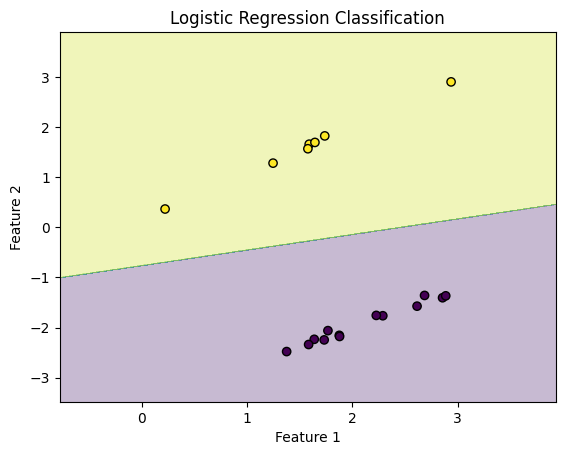

In [16]:
#visualization
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min,y_max,0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha = 0.3)
    plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors='k', marker= 'o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Logistic Regression Classification")
    plt.show()
    
plot_decision_boundary(X_test, y_test, log_reg)
    

In [18]:
#Linear regression 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train[:,0].reshape(-1,1), y_train)

y_prediction = lin_reg.predict(X_test[:,0].reshape(-1,1))


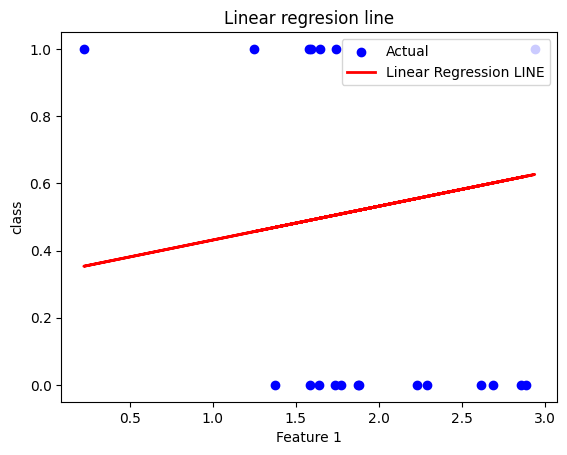

In [19]:
plt.scatter(X_test[:,0],y_test, color= 'blue', label = 'Actual')

plt.plot(X_test[:, 0], y_prediction, color= 'red', linewidth = 2, label = 'Linear Regression LINE')


plt.xlabel('Feature 1')
plt.ylabel('class')
plt.title('Linear regresion line')
plt.legend()
plt.show()
